In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import planck_colormap

cm = planck_colormap.colormap()
%matplotlib inline

In [61]:
# params
nside = 64
lmax = 3*nside//2
fwhm = (160/60)*np.pi/180
# importing Cls from theory
cl = np.loadtxt('input_files/Cl_ISW_scalar_PlanckPR2ISWpaper.dat')
# smoothing
cl = hp.gauss_beam(fwhm,lmax)**2*cl[:lmax+1]
# importing CRs
flm_list = np.load('ISW_cr_PPR2_hdu1_run_1_2912sims.npy')
# importing mask
mask = hp.read_map('input_files/COM_CompMap_ISW_0064_R2.00.fits',hdu=1,field={2},verbose=False)

In [62]:
# importing wf map and getting crs
wf = np.load('ISW_WF_PPR2_hdu1.npy')
cr_list = wf + flm_list

In [63]:
# generating lcdm maps
n = len(cr_list)
lcdm_list = [0]*n
for i in range(n):
    lcdm_list[i] = hp.synalm(cl,lmax,verbose=False)
lcdm_list = np.array(lcdm_list)

In [64]:
# getting list of cls
def get_cls(alm_set,lmax):
    size = len(alm_set)
    cl_list = [0]*size
    for i in range(size):
        cl_list[i] = hp.alm2cl(alm_set[i],lmax=lmax)
    return np.array(cl_list)

In [67]:
cls_crs = get_cls(cr_list,lmax)
cls_lcdm = get_cls(lcdm_list, lmax)

In [73]:
# mean and stdev of cls
def cls_stats(cl_list):
    mean = np.mean(cl_list,axis=0)
    stdev = np.std(cl_list,axis=0)
    return mean, stdev

# dl from cl
def dl(cl):
    ell = np.arange(len(cl))
    return ell*(ell+1)*cl/(2*np.pi)

In [72]:
cls_crs_mean, cls_crs_stdev = cls_stats(cls_crs)
cls_lcdm_mean, cls_lcdm_stdev = cls_stats(cls_lcdm)

In [87]:
# plot mean and stdev
def plot_dls(ax, cls_mean, cls_stdev, color, label):
    ell = np.arange(len(cls_mean))
    ax.fill_between(ell, y1=dl(cls_mean + cls_stdev), y2=dl(cls_mean - cls_stdev),
                    color=color, alpha=0.3)
    ax.plot(ell, dl(cls_mean),color=color,label=label, lw =2)

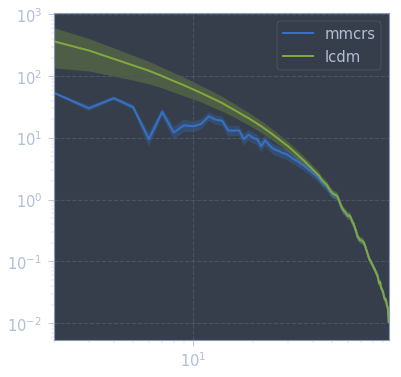

In [97]:
fig, ax1 = plt.subplots(1,1,figsize=(6,6),sharex=True)

plot_dls(ax1,cls_crs_mean,cls_crs_stdev,'C0', 'mmcrs')
plot_dls(ax1,cls_lcdm_mean,cls_lcdm_stdev,'C1', 'lcdm')

ax1.legend()
ax1.set_xlim(2,lmax)
ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()

In [132]:
isw, stdev, mask = hp.read_map('input_files/COM_CompMap_ISW_0064_R2.00.fits',
                               hdu=1,field={0,1,2},verbose=False)

# converting units to muK
tcmb = 2.7255 # from Planck params paper
isw[mask == 1] *= tcmb**2*10**6
stdev[mask==1] *= 2.7255*10**6

/home/marcio/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


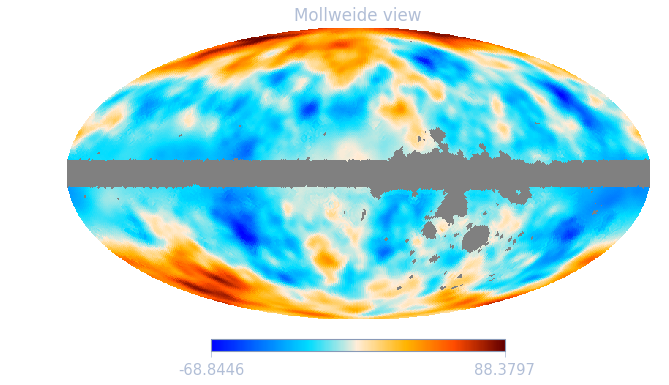

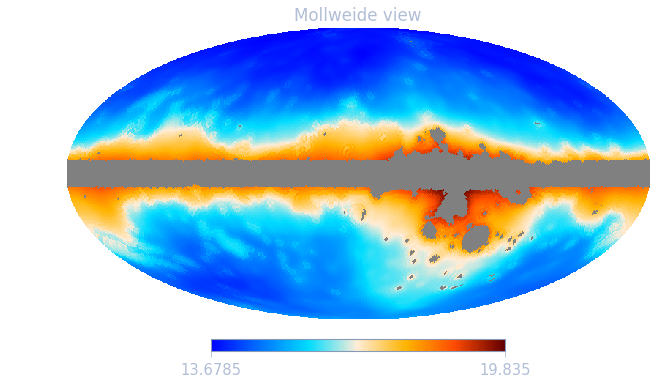

In [134]:
hp.mollview(isw,cmap=cm)
hp.mollview(stdev,cmap=cm)

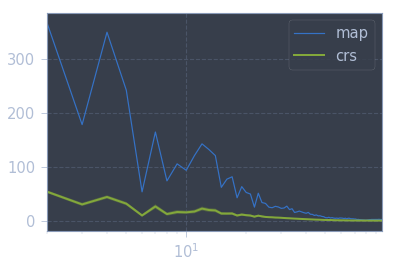

In [133]:
plt.plot(dl(hp.anafast(isw)),label='map')
plot_dls(plt,cls_crs_mean,cls_crs_stdev,'C1', 'crs')


plt.xscale('log')
plt.xlim(2,lmax)
plt.legend()
plt.show()